# TP 1

### Alumno: Javier Villagra

## Parte 2

In [1]:
# %matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Librerías propias
from utils import pixel_operators
from utils import image_show
from utils import graph_plot

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.

In [2]:
img1_tp_img = cv.imread('resources/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_tp_img = cv.imread('resources/img2_tp.png', cv.IMREAD_GRAYSCALE)

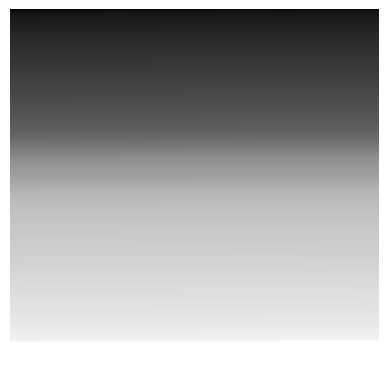

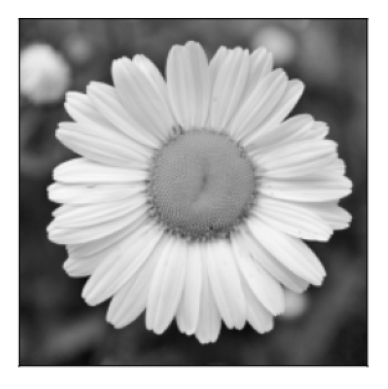

In [3]:
image_show.pyplot_image_show(img1_tp_img)
image_show.pyplot_image_show(img2_tp_img)

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

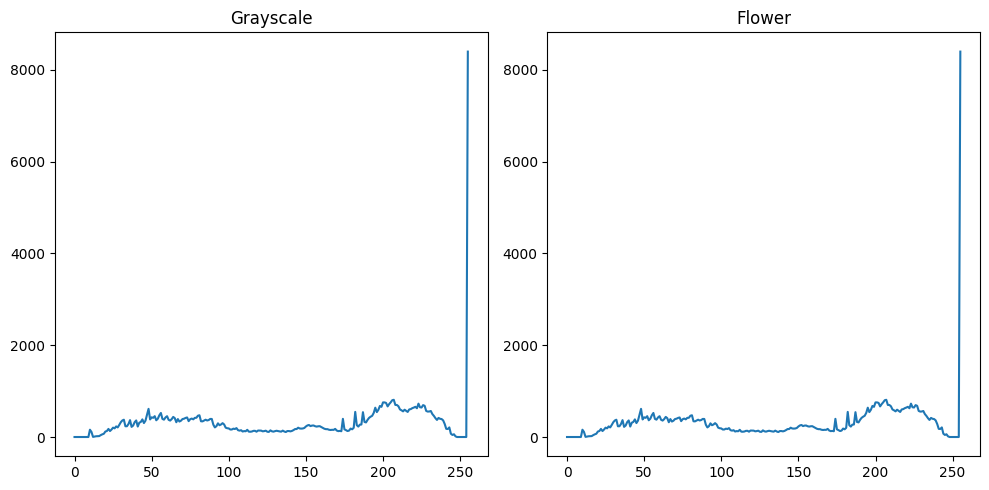

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

hist1,bins1 = np.histogram(img1_tp_img.ravel(),256,[0,256])
hist2,bins2 = np.histogram(img2_tp_img.ravel(),256,[0,256])

axs[0].set_title('Grayscale')
axs[0].plot(hist1)

axs[1].set_title('Flower')
axs[1].plot(hist2)

plt.tight_layout()
plt.show()

Se generó un histograma para cada imágen. Ya que ambas imágenes fueron cargadas como escala de grises, solo cuentan con un único canal, y es el cual fue tomado para realizar el histograma. Se tomaron 256 bins, uno por cada valor de intensidad posible.

Ambas imágenes presentan el mismo histograma, por lo que los histogramas unidimensionales no están brindando ninguna información valiosa a fin de poder diferenciar, por ejemplo, una flor de una simple escala de grises.

 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

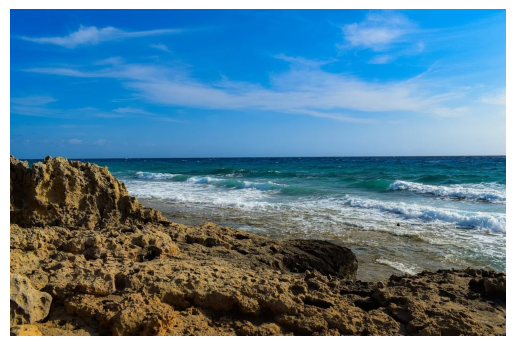

In [5]:
segmentacion_img = cv.imread('resources/segmentacion.png')
image_show.pyplot_image_show(segmentacion_img)

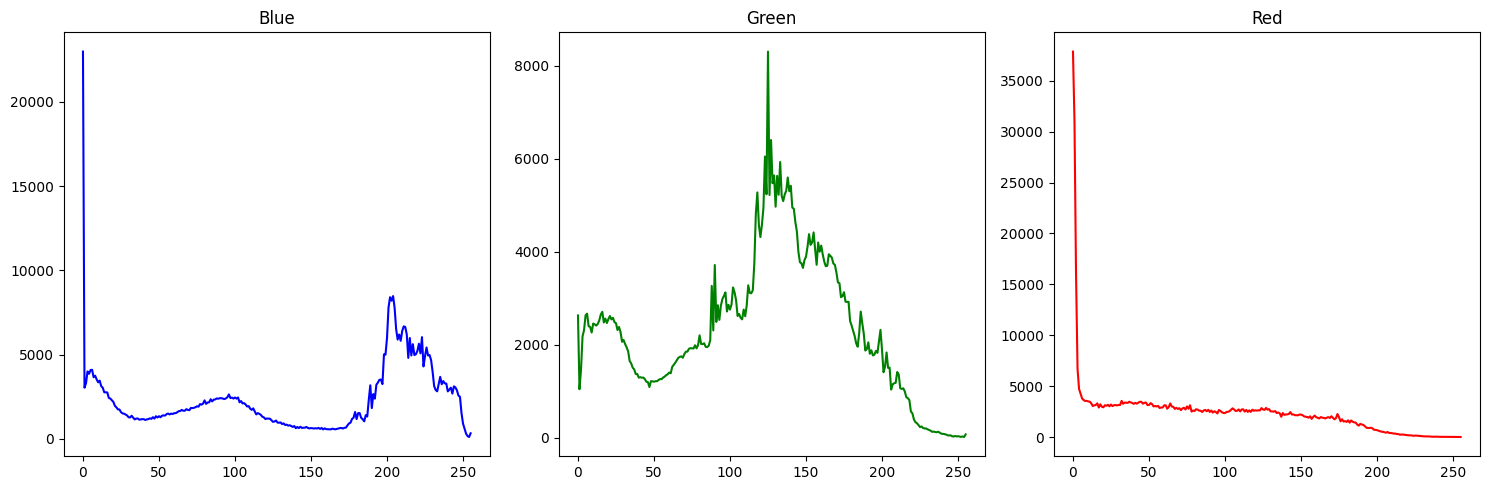

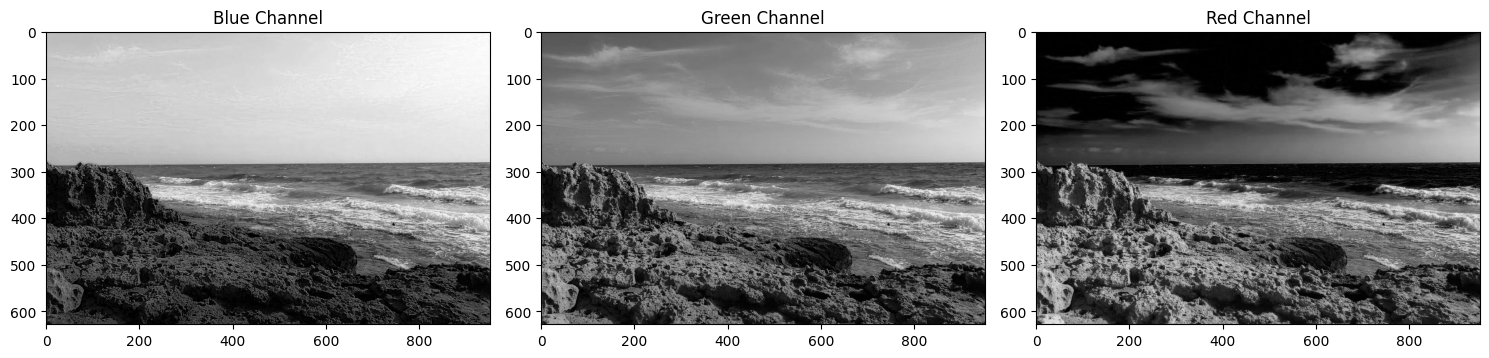

In [11]:
# Grafica un histograma bgr para la imagen a segmentar
graph_plot.histogram_bgr_plot(segmentacion_img)

# Grafica cada canal bgr por separado empleando la imagen
image_show.pyplot_bgr_image_channels(segmentacion_img)

La segmentación a partir de la separación de canales B, G y R no resulta tan evidente. Luego del análisis del histograma y de las imágenes generadas a partir de la intensidad en cada canal, BGR no se perfila como una buena estrategia de segmentación.

A fin de realizar una correcta segmentación, se empleará el espacio de color HSV.

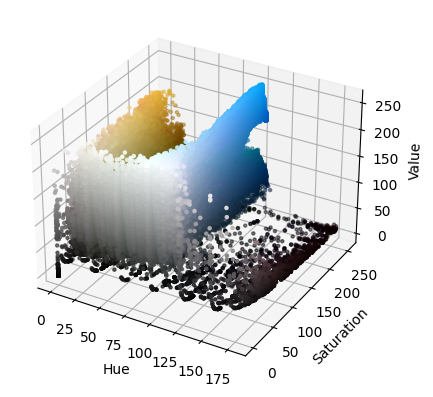

In [8]:
# %matplotlib widget
h, s, v = graph_plot.histogram_3D_hsv_plot(segmentacion_img)

Desde otro ángulo, se puede ver en el gráfico lo siguiente:

<div>
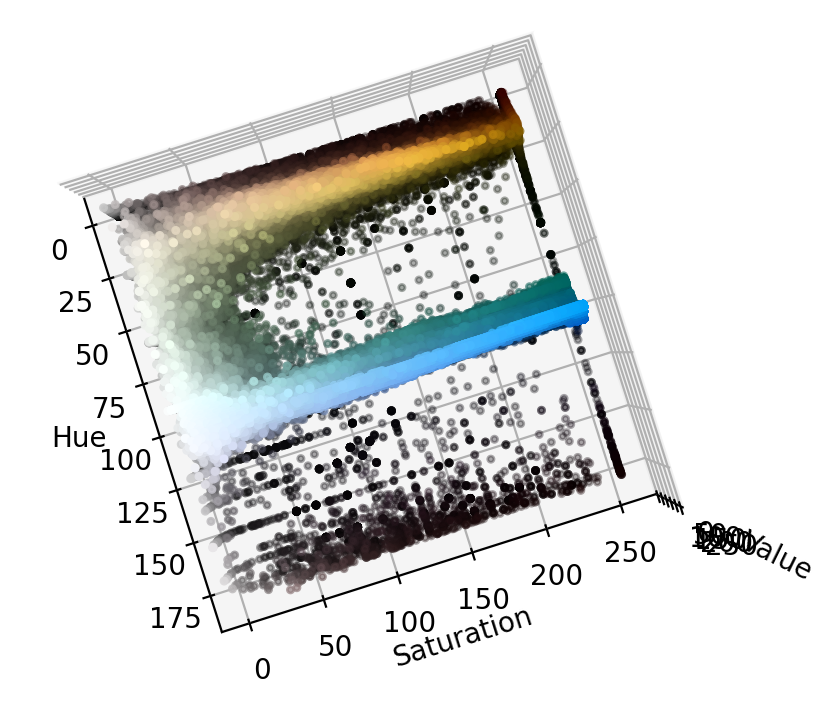
</div>

Observando la gráfica desde esta perspectiva, se puede apreciar que el modo HSV es un muy buen candidato para realizar la segmentación. A continuación se analiza cada canal HSV por separado a fin de generar una máscara apropiada.

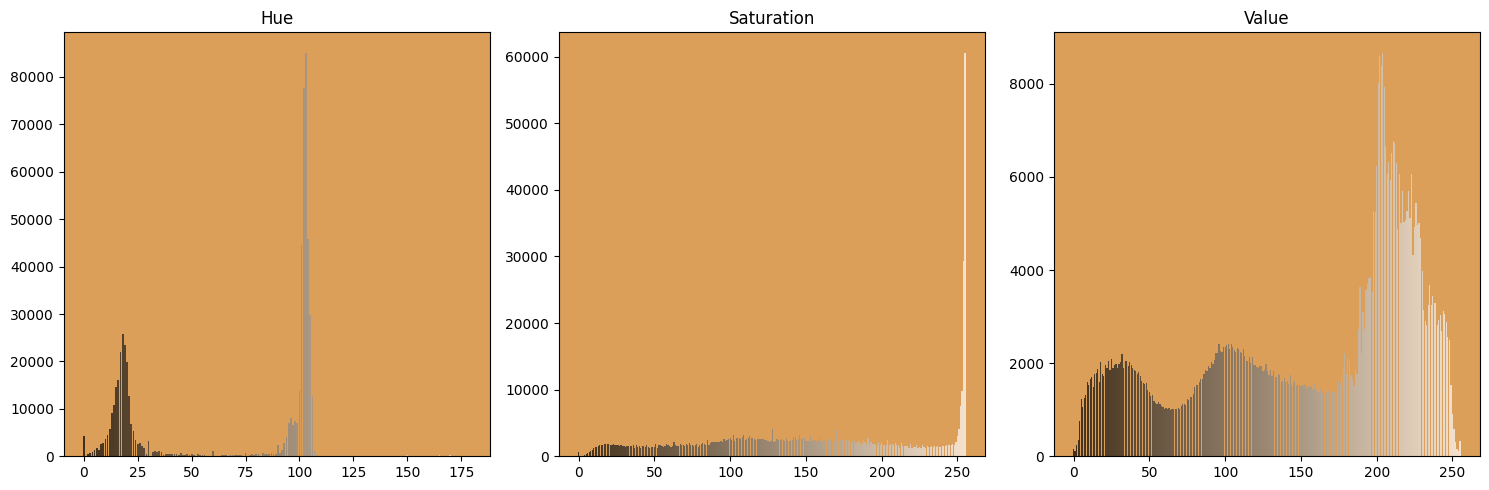

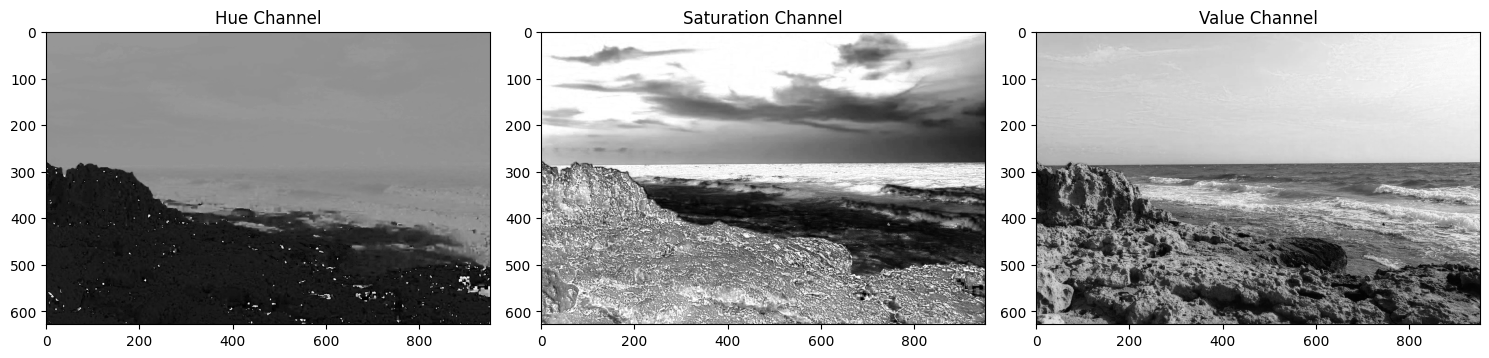

In [9]:
# Grafica un histograma hsv para la imagen a segmentar
graph_plot.histogram_hsv_plot(segmentacion_img)

# Grafica cada canal hsv por separado empleando la imagen
image_show.pyplot_hsv_image_channels(segmentacion_img)

Vemos que los canales H y V pueden ser de gran utilidad para reconocer las regiones en la imagen. No ocurre lo mismo con el canal S, ya que se observan casi todas las intensidades en cada una de las tres regiones.

Para cada región:

Tierra: Hue (0-50) | Saturation (0-255) | Value (0-200)

Agua: Hue (100-180) | Saturation (0-255) | Value (100-200)

Cielo: Hue (100-180) | Saturation (0-255) | Value (170-255)

Se aplican estos criterios a una máscara para identificar las regiones.


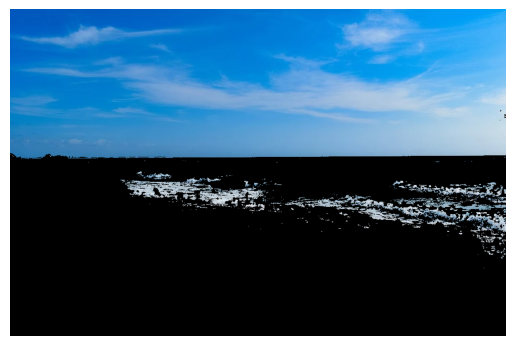

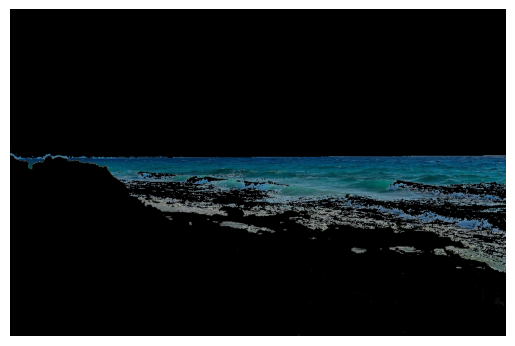

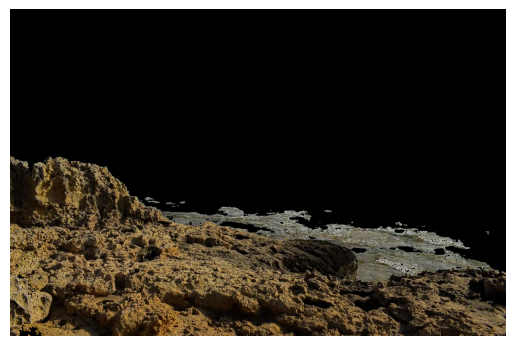

In [10]:
segmentacion_img_hsv = cv.cvtColor(segmentacion_img, cv.COLOR_BGR2HSV)

mask_sky = cv.inRange(segmentacion_img_hsv, (100, 0, 170), (180, 255, 255))
mask_sea = cv.inRange(segmentacion_img_hsv, (50, 0, 0), (110, 255, 170))
mask_ground = cv.inRange(segmentacion_img_hsv, (0, 0, 0), (50, 255, 200))

# Aplico máscaras
sky_segmentacion_img = cv.bitwise_and(segmentacion_img, segmentacion_img, mask=mask_sky)
sea_segmentacion_img = cv.bitwise_and(segmentacion_img, segmentacion_img, mask=mask_sea)
ground_segmentacion_img = cv.bitwise_and(segmentacion_img, segmentacion_img, mask=mask_ground)

image_show.pyplot_image_show(sky_segmentacion_img)
image_show.pyplot_image_show(sea_segmentacion_img)
image_show.pyplot_image_show(ground_segmentacion_img)

Los resultados son bastante buenos, salvo por la espuma del mar que se confunde con el cielo.